# Imports

In [104]:
using DataFrames
using CSV
using MLJ
using DecisionTree: print_tree
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

In [143]:
mkdir("Figures/")

"Figures/"

# Data

In [105]:
df = CSV.read("data.csv")

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [106]:
data = separate_bases(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0,65.0
2,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0,67.0
3,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0,71.0
4,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0,84.0
5,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0,67.0
6,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0,71.0
7,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0,71.0
8,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0,67.0
9,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0,65.0


In [107]:
data = hcat(df,data)

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


Look at class labels to see if dataset is imbalanced

In [108]:
# data[:,3:5]

In [109]:
data = data[:, Not(2:3)]

,Class,x1,x2,x3,x4,x5,x6,x7,x8
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,EI,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0
2,EI,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0
3,EI,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0
4,EI,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0
5,EI,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0
6,EI,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0
7,EI,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0
8,EI,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0
9,EI,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0


In [110]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 3 entries:
  "IE" => 768
  "EI" => 767
  "N"  => 1655

In [111]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.24075235109717869
 0.24043887147335424
 0.5188087774294671

Get data ready for training

In [112]:
schema(data)

┌─────────┬─────────┬────────────┐
│ _.names │ _.types │ _.scitypes │
├─────────┼─────────┼────────────┤
│ Class   │ String  │ Textual    │
│ x1      │ Float64 │ Continuous │
│ x2      │ Float64 │ Continuous │
│ x3      │ Float64 │ Continuous │
│ x4      │ Float64 │ Continuous │
│ x5      │ Float64 │ Continuous │
│ x6      │ Float64 │ Continuous │
│ x7      │ Float64 │ Continuous │
│ x8      │ Float64 │ Continuous │
│ x9      │ Float64 │ Continuous │
│ x10     │ Float64 │ Continuous │
│ x11     │ Float64 │ Continuous │
│ x12     │ Float64 │ Continuous │
│ x13     │ Float64 │ Continuous │
│ x14     │ Float64 │ Continuous │
│ x15     │ Float64 │ Continuous │
│ x16     │ Float64 │ Continuous │
│ x17     │ Float64 │ Continuous │
│ x18     │ Float64 │ Continuous │
│ x19     │ Float64 │ Continuous │
│ x20     │ Float64 │ Continuous │
│ x21     │ Float64 │ Continuous │
│ x22     │ Float64 │ Continuous │
│ x23     │ Float64 │ Continuous │
│ x24     │ Float64 │ Continuous │
│ x25     │ Float64 

In [113]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ Class   │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ x1      │ Float64                         │ Continuous    │
│ x2      │ Float64                         │ Continuous    │
│ x3      │ Float64                         │ Continuous    │
│ x4      │ Float64                         │ Continuous    │
│ x5      │ Float64                         │ Continuous    │
│ x6      │ Float64                         │ Continuous    │
│ x7      │ Float64                         │ Continuous    │
│ x8      │ Float64                         │ Continuous    │
│ x9      │ Float64                         │ Continuous    │
│ x10     │ Float64                         │ Continuous    │
│ x11     │ Float64                         │ Continuous    │
│ x12     │ Float64                         │ Continuous    │
│ x13   

In [114]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI"  …  "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"], 3190×60 DataFrame. Omitted printing of 53 columns
│ Row  │ x1      │ x2      │ x3      │ x4      │ x5      │ x6      │ x7      │
│      │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 67.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │
│ 2    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 67.0    │ 67.0    │ 71.0    │
│ 3    │ 71.0    │ 65.0    │ 71.0    │ 71.0    │ 84.0    │ 71.0    │ 65.0    │
│ 4    │ 71.0    │ 71.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │ 67.0    │
│ 5    │ 71.0    │ 67.0    │ 84.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │
│ 6    │ 67.0    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 84.0    │ 71.0    │
│ 7    │ 67.0    │ 67.0    │ 84.0    │ 84.0    │ 84.0    │ 71.0    │ 65.0    │
│ 8    │ 67.0

Partition train and test data accoring to class labels

In [299]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=113, stratify=values(data[:Class])) # gives 70:30 split

([1538, 582, 137, 1511, 1964, 2204, 2888, 2375, 2864, 1387  …  656, 625, 283, 1076, 2074, 743, 3177, 530, 592, 2916], [898, 2807, 2307, 2787, 1648, 1390, 3044, 2312, 586, 1612  …  2993, 729, 3006, 958, 2551, 1687, 2792, 2185, 1273, 1616])

In [300]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.24059561128526646
 0.5188087774294671
 0.24059561128526646

In [301]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.2413793103448276
 0.5188087774294671
 0.23981191222570533

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [302]:
models(matching(X,y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [303]:
@load DecisionTreeClassifier verbosity=2

┌ Info: Model code for DecisionTreeClassifier already loaded
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:54


DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @882

## Decision trees
* Be sure to use some form of pruning. 
* You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/#MLJModels.UnivariateDiscretizer
1. https://alan-turing-institute.github.io/MLJ.jl/dev/getting_started/#Getting-Started-1

### No post-pruning

In [304]:
dt = DecisionTreeClassifier(post_prune=false, display_depth=8)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 8) @548

In [305]:
Tree = machine(dt, X, y)

Machine{DecisionTreeClassifier} @992 trained 0 times.
  args: 
    1:	Source @309 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @987 ⏎ `AbstractArray{Multiclass{3},1}`


In [306]:
fit!(Tree, rows=train, verbosity=2)

Feature 29, Threshold 66.0
L-> Feature 32, Threshold 77.5
    L-> Feature 30, Threshold 69.0
        L-> Feature 28, Threshold 77.5
            L-> 3 : 92/92
            R-> Feature 54, Threshold 66.0
                L-> Feature 10, Threshold 69.0
                    L-> 2 : 1/1
                    R-> 3 : 1/1
                R-> 3 : 12/12
        R-> Feature 30, Threshold 77.5
            L-> Feature 28, Threshold 66.0
                L-> Feature 21, Threshold 77.5
                    L-> Feature 19, Threshold 77.5
                        L-> 3 : 16/16
                        R-> Feature 47, Threshold 66.0
                            L-> 3 : 4/4
                            R-> 
                    R-> Feature 22, Threshold 77.5
                        L-> 3 : 3/3
                        R-> 2 : 9/9
                R-> Feature 28, Threshold 69.0
                    L-> Feature 24, Threshold 66.0
                        L-> Feature 18, Threshold 66.0
                            L-> 3 : 

┌ Info: Training Machine{DecisionTreeClassifier} @992.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @992 trained 1 time.
  args: 
    1:	Source @309 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @987 ⏎ `AbstractArray{Multiclass{3},1}`


In [307]:
dt_acc = evaluate!(Tree, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                             │
├───────────────┼───────────────┼────────────────────────────────────────┤
│ cross_entropy │ 3.25          │ [2.91, 3.39, 3.73, 2.3, 3.6, 3.6]      │
│ acc           │ 0.91          │ [0.919, 0.906, 0.897, 0.936, 0.9, 0.9] │
└───────────────┴───────────────┴────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [308]:
fitted_params(Tree) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 152
Depth:  13,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("IE" => 0x00000002,"EI" => 0x00000001,"N" => 0x00000003),)

In [309]:
report(Tree)

(classes_seen = CategoricalValue{String,UInt32}["EI", "IE", "N"],
 print_tree = TreePrinter object (call with display depth),)

### Using Post-pruning

In [310]:
dt2 = DecisionTreeClassifier(post_prune=true)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @779

In [311]:
Tree2 = machine(dt2, X, y)

Machine{DecisionTreeClassifier} @857 trained 0 times.
  args: 
    1:	Source @042 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @256 ⏎ `AbstractArray{Multiclass{3},1}`


In [312]:
fit!(Tree2, rows=train, verbosity=2, force=true)

┌ Info: Training Machine{DecisionTreeClassifier} @857.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Feature 29, Threshold 66.0
L-> Feature 32, Threshold 77.5
    L-> Feature 30, Threshold 69.0
        L-> Feature 28, Threshold 77.5
            L-> 3 : 92/92
            R-> Feature 23, Threshold 77.5
                L-> 3 : 12/12
                R-> 
        R-> Feature 30, Threshold 77.5
            L-> Feature 28, Threshold 66.0
                L-> 
                R-> 
            R-> 3 : 41/41
    R-> Feature 31, Threshold 69.0
        L-> Feature 30, Threshold 69.0
            L-> 3 : 27/27
            R-> Feature 30, Threshold 77.5
                L-> 
                R-> 3 : 6/6
        R-> Feature 31, Threshold 77.5
            L-> Feature 35, Threshold 69.0
                L-> 
                R-> 
            R-> Feature 30, Threshold 69.0
                L-> 3 : 11/11
                R-> 
R-> Feature 32, Threshold 74.5
    L-> Feature 21, Threshold 81.0
        L-> Feature 22, Threshold 77.5
            L-> 3 : 459/459
            R-> Feature 56, Threshold 77.5
            

Machine{DecisionTreeClassifier} @857 trained 1 time.
  args: 
    1:	Source @042 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @256 ⏎ `AbstractArray{Multiclass{3},1}`


In [313]:
dt_acc = evaluate!(Tree2, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                 │
├───────────────┼───────────────┼────────────────────────────────────────────┤
│ cross_entropy │ 3.01          │ [3.66, 2.37, 3.18, 2.78, 3.05, 2.99]       │
│ acc           │ 0.917         │ [0.898, 0.934, 0.912, 0.923, 0.915, 0.917] │
└───────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [36.0, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [314]:
# evaluate!(Tree2, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [315]:
fitted_params(Tree2) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 156
Depth:  18,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("IE" => 0x00000002,"EI" => 0x00000001,"N" => 0x00000003),)

In [316]:
report(Tree2)

(classes_seen = CategoricalValue{String,UInt32}["EI", "IE", "N"],
 print_tree = TreePrinter object (call with display depth),)

### GridSearch / RandomSearch

In [317]:
vals = collect(0:.01:1)
r = range(dt2, :merge_purity_threshold, values=vals)
# r = range(nn2, :epochs, lower=0, upper=max_epochs)
curve = learning_curve(Tree2, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(), 
                        measure=cross_entropy, 
                        acceleration=CPUThreads())

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @030.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 101 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 101 metamodels: 100%[=========================] Time: 0:00:19


(parameter_name = "merge_purity_threshold",
 parameter_scale = :none,
 parameter_values = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0],
 measurements = [1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119, 1.4475060485254119  …  5.130713650700985, 4.743104094779833, 5.212418686748813, 5.356310610316722, 5.390402564048269, 5.378743813251407, 5.365472210941975, 5.4897891224018736, 5.128019434484666, 5.433287235000411],)

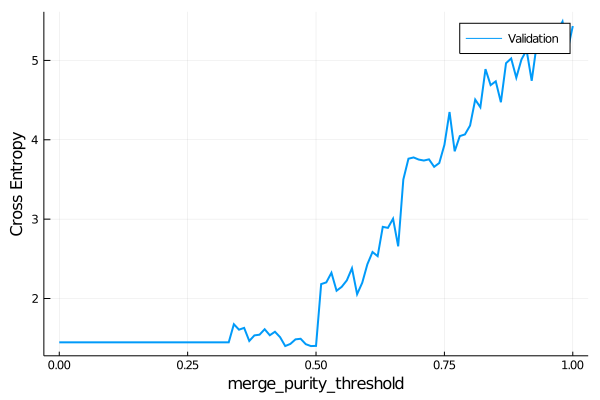

In [318]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
# plot!(Net2.report.training_losses, label="Training", lw=2)

In [319]:
a = round(minimum(curve.measurements), digits=5)

1.40078

In [320]:
param1 = :merge_purity_threshold

r1 = range(dt2, param1, lower=0, upper=1, scale=:linear)

MLJBase.NumericRange(Float64, :merge_purity_threshold, ... )

In [321]:
self_tuning_dt_model = TunedModel(model=dt2,
                                    tuning=Grid(goal=100),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1])

ProbabilisticTunedModel(
    model = DecisionTreeClassifier(
            max_depth = -1,
            min_samples_leaf = 1,
            min_samples_split = 2,
            min_purity_increase = 0.0,
            n_subfeatures = 0,
            post_prune = true,
            merge_purity_threshold = 1.0,
            pdf_smoothing = 0.0,
            display_depth = 5),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @458],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(not

In [322]:
self_tuning_dt = machine(self_tuning_dt_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @498 trained 0 times.
  args: 
    1:	Source @689 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @556 ⏎ `AbstractArray{Multiclass{3},1}`


In [323]:
z = fit!(self_tuning_dt, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @498.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:15


Machine{ProbabilisticTunedModel{Grid,…}} @498 trained 1 time.
  args: 
    1:	Source @689 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @556 ⏎ `AbstractArray{Multiclass{3},1}`


In [324]:
best = fitted_params(self_tuning_dt)
best

(best_model = DecisionTreeClassifier @193,
 best_fitted_params = (tree = Decision Tree
Leaves: 12
Depth:  9,
                       encoding = Dict{CategoricalValue{String,UInt32},UInt32}("IE" => 0x00000002,"EI" => 0x00000001,"N" => 0x00000003),),)

In [325]:
best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.494949494949495,
    pdf_smoothing = 0.0,
    display_depth = 5) @193

In [326]:
best_loss = round(z.report.best_result.measurement[1],digits=5)
best_mpt = round(best.best_model.merge_purity_threshold,digits=5)

0.49495

In [327]:
fn = "Figures/LearningCurve_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curve

In [328]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X[train,:], y[train], acc, step=10)

(d, train_metric, valid_metric) = (10, 0.6, 0.5509803921568628)
(d, train_metric, valid_metric) = (20, 0.7, 0.5509803921568628)
(d, train_metric, valid_metric) = (30, 0.6666666666666666, 0.5509803921568628)
(d, train_metric, valid_metric) = (40, 0.825, 0.6509803921568628)
(d, train_metric, valid_metric) = (50, 0.6, 0.5509803921568628)
(d, train_metric, valid_metric) = (60, 0.5833333333333334, 0.5509803921568628)
(d, train_metric, valid_metric) = (70, 0.5857142857142857, 0.5509803921568628)
(d, train_metric, valid_metric) = (80, 0.5625, 0.5509803921568628)
(d, train_metric, valid_metric) = (90, 0.5666666666666667, 0.5509803921568628)
(d, train_metric, valid_metric) = (100, 0.57, 0.5509803921568628)
(d, train_metric, valid_metric) = (110, 0.5636363636363636, 0.5509803921568628)
(d, train_metric, valid_metric) = (120, 0.55, 0.5509803921568628)
(d, train_metric, valid_metric) = (130, 0.8153846153846154, 0.692156862745098)
(d, train_metric, valid_metric) = (140, 0.6642857142857143, 0.637254

(d, train_metric, valid_metric) = (1110, 0.7513513513513513, 0.7549019607843137)
(d, train_metric, valid_metric) = (1120, 0.7642857142857142, 0.7725490196078432)
(d, train_metric, valid_metric) = (1130, 0.7654867256637168, 0.7725490196078432)
(d, train_metric, valid_metric) = (1140, 0.7640350877192983, 0.7666666666666667)
(d, train_metric, valid_metric) = (1150, 0.7643478260869565, 0.7666666666666667)
(d, train_metric, valid_metric) = (1160, 0.7655172413793103, 0.7764705882352941)
(d, train_metric, valid_metric) = (1170, 0.852991452991453, 0.8058823529411765)
(d, train_metric, valid_metric) = (1180, 0.8466101694915255, 0.8)
(d, train_metric, valid_metric) = (1190, 0.8470588235294118, 0.8)
(d, train_metric, valid_metric) = (1200, 0.8458333333333333, 0.792156862745098)
(d, train_metric, valid_metric) = (1210, 0.8471074380165289, 0.7862745098039216)
(d, train_metric, valid_metric) = (1220, 0.8475409836065574, 0.7901960784313725)
(d, train_metric, valid_metric) = (1230, 0.848780487804878, 

(10:10:2040, Any[0.6, 0.7, 0.6666666666666666, 0.825, 0.6, 0.5833333333333334, 0.5857142857142857, 0.5625, 0.5666666666666667, 0.57  …  0.7635897435897436, 0.763265306122449, 0.7624365482233503, 0.7626262626262627, 0.7633165829145728, 0.7635, 0.764179104477612, 0.7628712871287129, 0.7620689655172413, 0.7627450980392156], Any[0.5509803921568628, 0.5509803921568628, 0.5509803921568628, 0.6509803921568628, 0.5509803921568628, 0.5509803921568628, 0.5509803921568628, 0.5509803921568628, 0.5509803921568628, 0.5509803921568628  …  0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844, 0.7372549019607844])

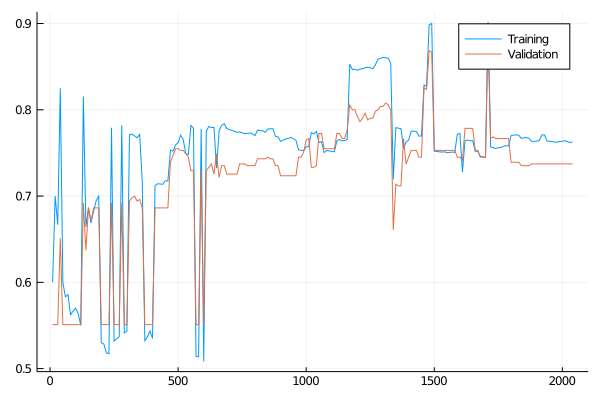

In [329]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")

In [330]:
fn = "Figures/LearningCurve_DT"
png(replace(fn,'.' => ','))

# Final Results

In [331]:
final_dt = best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.494949494949495,
    pdf_smoothing = 0.0,
    display_depth = 5) @193

In [332]:
Final_Tree = machine(final_dt, X, y)

Machine{DecisionTreeClassifier} @004 trained 0 times.
  args: 
    1:	Source @405 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @160 ⏎ `AbstractArray{Multiclass{3},1}`


In [333]:
fit!(Final_Tree, rows=train, verbosity=2)

Feature 29, Threshold 66.0
L-> Feature 32, Threshold 77.5
    L-> 2 : 415/645
    R-> Feature 31, Threshold 69.0
        L-> 2 : 91/132
        R-> Feature 31, Threshold 77.5
            L-> Feature 35, Threshold 69.0
                L-> 
                R-> 
            R-> 3 : 21/40
R-> 3 : 1015/1266


┌ Info: Training Machine{DecisionTreeClassifier} @004.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @004 trained 1 time.
  args: 
    1:	Source @405 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @160 ⏎ `AbstractArray{Multiclass{3},1}`


In [334]:
ŷ2 = MLJ.predict(Final_Tree, X[test,:]);

In [335]:
cross_entropy(ŷ2, y[test]) |> mean

0.7205700953864274

In [336]:
acc(ŷ2, y[test])

0.719435736677116

In [337]:
confusion_matrix(mode.(ŷ2), y[test])

┌ Warning: The classes are un-ordered,
│ using order: ["EI", "IE", "N"].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:87


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     EI      │     IE      │      N      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     EI      │     77      │      9      │      2      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     IE      │      5      │     135     │     82      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│      N      │     71      │     10      │     247     │
└─────────────┴─────────────┴─────────────┴─────────────┘
